In [1]:
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread
from sklearn.cluster import KMeans
from pylab import imshow
import pandas as pd
import numpy as np
import math

In [2]:
%matplotlib inline

In [3]:
image = imread('parrots.jpg')

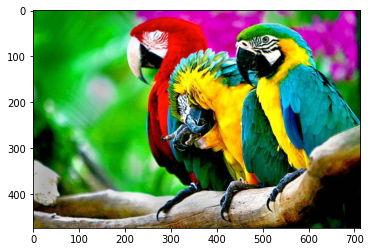

In [4]:
imshow(image)

In [5]:
img = img_as_float(image)
H, W, C = img.shape

In [6]:
data_train = pd.DataFrame(img.reshape((H*W, C)), columns=['R', 'G', 'B'])
data_train.head(3)

,R,G,B
0,0.015686,0.494118,0.019608
1,0.011765,0.490196,0.015686
2,0.007843,0.494118,0.007843


In [19]:
def PSNR(mean_image, median_image):
    
    mse_mean = np.sum((img - mean_image)**2) / (H * W * 3)
    mse_median = np.sum((img - median_image)**2) / (H * W * 3)
        
    
    psnr_mean = 10.0 * math.log10(1.0 / mse_mean)
    psnr_median = 10.0 * math.log10(1.0 / mse_median)
    
    return psnr_mean, psnr_median

In [20]:
def show_images(mean_image: np.array, median_image: np.array) -> None:
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    imshow(mean_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    imshow(median_image)
    
    plt.show()

In [21]:
def train_kmeans_for_n_clusters(data, strategy='median'):
    
    data_copy = data.copy(deep=True)
    
    for n_clusters in range(1, 21):

        kmeans = KMeans(random_state=241, n_clusters=n_clusters)
        kmeans.fit(data_copy)
        
        cluster_label = kmeans.predict(data_copy)
        data_copy["cluster"] = cluster_label
        
        # Means
        groupped_mean = data_copy.groupby("cluster").mean().values
        mean_pixels = np.array([groupped_mean[cl] for cl in data_copy["cluster"]])
        image_mean = mean_pixels.reshape(H, W, C)
        
        # Medians
        groupped_median = data_copy.groupby("cluster").median().values
        median_pixels = np.array([groupped_median[cl] for cl in data_copy["cluster"]])
        image_median = median_pixels.reshape(H, W, C)
        
        show_images(image_mean, image_median)
        
        psnr_mean, psnr_median = PSNR(image_mean, image_median)
        
        print(f"N clusters: {n_clusters}, PSNR_mean: {psnr_mean}, PSNR_median: {psnr_median}")

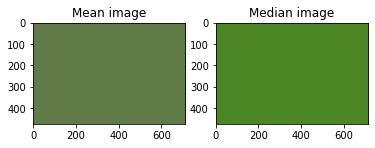

N clusters: 1, PSNR_mean: 9.83775889535693, PSNR_median: 9.460408259198367


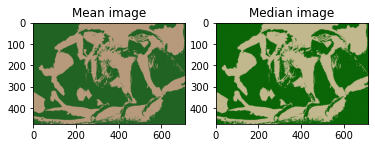

N clusters: 2, PSNR_mean: 12.112006425828914, PSNR_median: 11.687840362235944


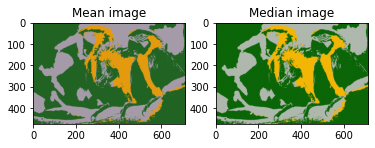

N clusters: 3, PSNR_mean: 13.070660053390288, PSNR_median: 12.595776589100339


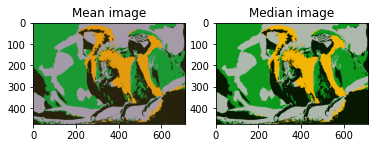

N clusters: 4, PSNR_mean: 14.231017503396002, PSNR_median: 13.681453942622298


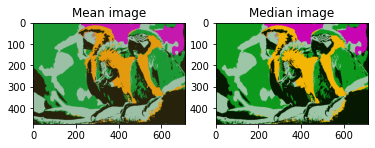

N clusters: 5, PSNR_mean: 15.265814970169927, PSNR_median: 14.74412524999574


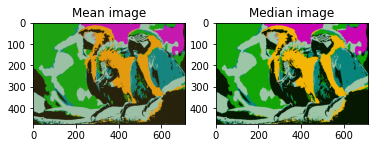

N clusters: 6, PSNR_mean: 15.948425554938224, PSNR_median: 15.460530358543245


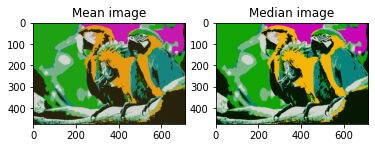

N clusters: 7, PSNR_mean: 16.735828488534462, PSNR_median: 16.158410420901394


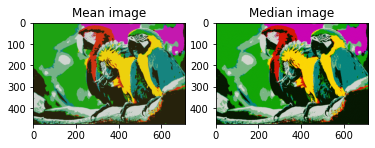

N clusters: 8, PSNR_mean: 17.57211421730507, PSNR_median: 16.95790170312456


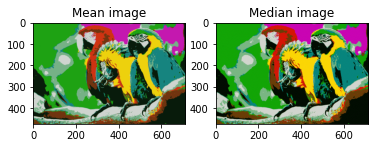

N clusters: 9, PSNR_mean: 18.429470769357234, PSNR_median: 18.018655591305127


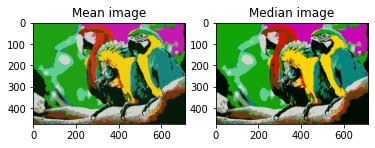

N clusters: 10, PSNR_mean: 18.81900996602964, PSNR_median: 18.37731540742493


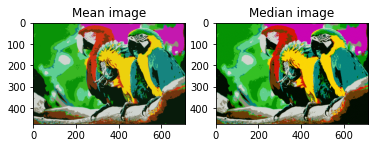

N clusters: 11, PSNR_mean: 19.238315907164928, PSNR_median: 18.855274282129578


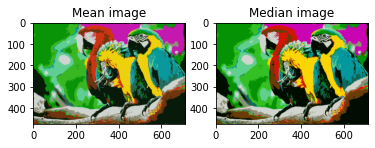

N clusters: 12, PSNR_mean: 19.555404094742112, PSNR_median: 19.1500773402069


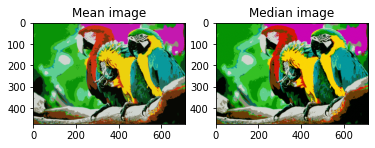

N clusters: 13, PSNR_mean: 19.864851025483443, PSNR_median: 19.518600465296288


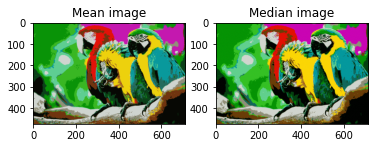

N clusters: 14, PSNR_mean: 20.150959132101832, PSNR_median: 19.880510997641625


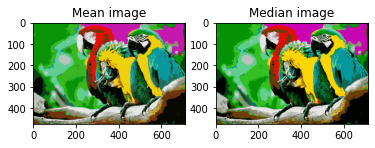

N clusters: 15, PSNR_mean: 20.453589966609556, PSNR_median: 20.164498060336502


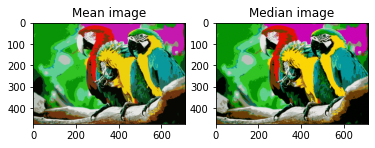

N clusters: 16, PSNR_mean: 20.71209722899274, PSNR_median: 20.42893179640238


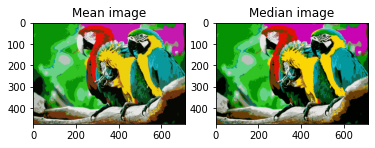

N clusters: 17, PSNR_mean: 20.99423429751806, PSNR_median: 20.694560401683


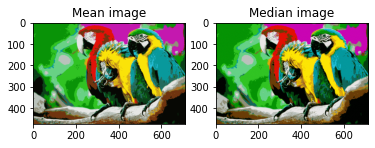

N clusters: 18, PSNR_mean: 21.233955480463887, PSNR_median: 20.952874008668164


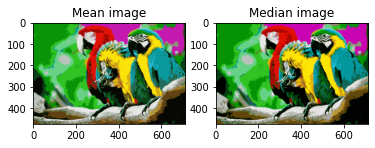

N clusters: 19, PSNR_mean: 21.531884059053784, PSNR_median: 21.24825307075821


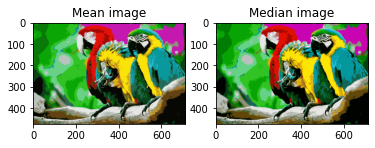

N clusters: 20, PSNR_mean: 21.732777940733918, PSNR_median: 21.430516138072445


In [22]:
train_kmeans_for_n_clusters(data_train)